In [9]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import ExtraTreesClassifier


data = pd.read_csv("C://Users//wolle//Downloads//Compressed//train.csv")
print(data)
X = data.drop(columns=['price_range'])
y = data['price_range']

selector = SelectKBest(chi2 , k = 10)
X_selected = selector.fit_transform(X , y)
selected_features = X.columns[selector.get_support()]

print(selected_features)


      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

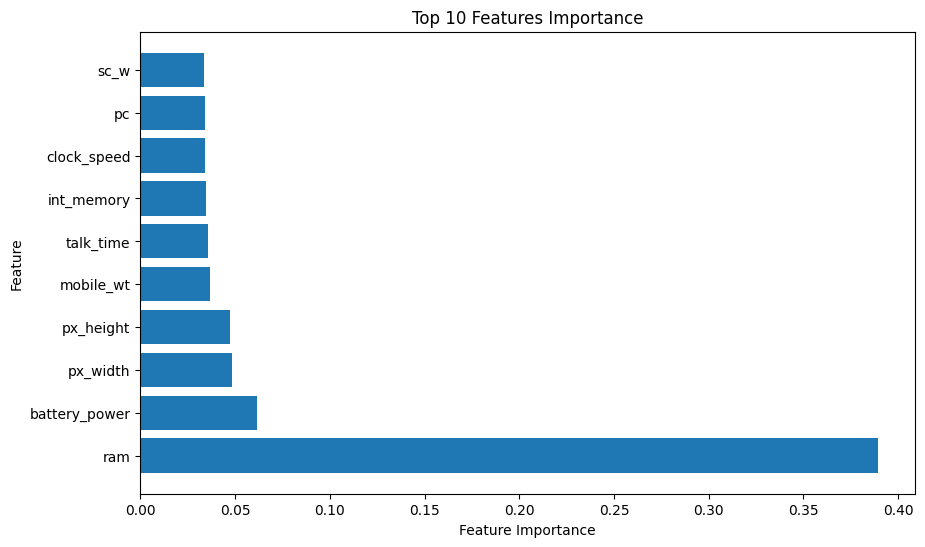

In [6]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

data = pd.read_csv("C://Users//wolle//Downloads//Compressed//train.csv")
model = ExtraTreesClassifier()
model.fit(X , y)
#feature importance extraction
importances = model.feature_importances_

#sorting
indices = (-importances).argsort()
#slicing for top 10

top_10_indices = indices[:10]
top_10_features = X.columns[top_10_indices]
top_10_importances = importances[top_10_indices]

plt.figure(figsize = (10 , 6))
plt.barh(range(len(top_10_features)), top_10_importances, align='center')
plt.yticks(range(len(top_10_features)), top_10_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features Importance')
plt.show()

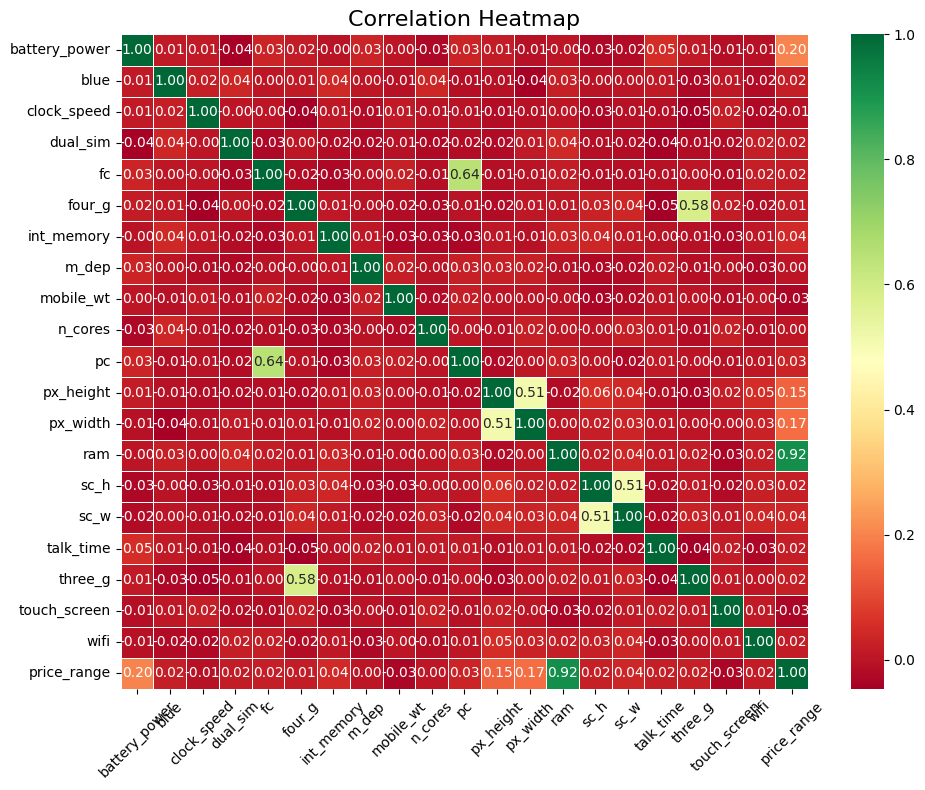

In [8]:
import seaborn as sns
corrmat = data.corr()
plt.figure(figsize=(10, 8))
heat_map = sns.heatmap(corrmat, annot=True, fmt=".2f", cmap='RdYlGn', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()